In [15]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


from prophet import Prophet

In [16]:
file_path = '/Users/yingzhou/Downloads/Capstone_Babyname/Notebook_data/data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to verify
print(df.head())

   Unnamed: 0     Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio
0           0    Emily  2000      F  25959    6.867840          14.295257
1           1   Hannah  2000      F  23086    6.107745          12.713136
2           2  Madison  2000      F  19968    5.282832          10.996097
3           3   Ashley  2000      F  17998    4.761639           9.911246
4           4    Sarah  2000      F  17713    4.686238           9.754300


In [17]:
file_path = '/Users/yingzhou/Downloads/Capstone_Babyname/Notebook_data/dataset3.csv'

# Read the CSV file into a DataFrame
rank = pd.read_csv(file_path)

# Display the first few rows to verify
print(rank.head())


   Unnamed: 0  Rank      Name  Number Gender  Year
0           0     1    OLIVER     555   Male  2023
1           1     2      NOAH     537   Male  2023
2           2     3       LEO     409   Male  2023
3           3     4     HENRY     404   Male  2023
4           4     5  THEODORE     400   Male  2023


In [18]:
# Prove the prediction
# Filter for the year 2023
years_of_interest = [2023]
rank_filtered = rank[rank['Year'].isin(years_of_interest)]

# Top 100 male names for 2023
top_100_male_2023 = rank_filtered[(rank_filtered['Year'] == 2023) & (rank_filtered['Gender'] == 'Male')].head(100)

# Top 100 female names for 2023
top_100_female_2023 = rank_filtered[(rank_filtered['Year'] == 2023) & (rank_filtered['Gender'] == 'Female')].head(100)

# Display the results
print("Top 100 Male Names for 2023:")
print(top_100_male_2023)

print("\nTop 100 Female Names for 2023:")
print(top_100_female_2023)


Top 100 Male Names for 2023:
    Unnamed: 0  Rank      Name  Number Gender  Year
0            0     1    OLIVER     555   Male  2023
1            1     2      NOAH     537   Male  2023
2            2     3       LEO     409   Male  2023
3            3     4     HENRY     404   Male  2023
4            4     5  THEODORE     400   Male  2023
..         ...   ...       ...     ...    ...   ...
95          95    93    JOSHUA      89   Male  2023
96          96    97      ZAYN      88   Male  2023
97          97    97    MARCUS      88   Male  2023
98          98    97     ASHER      88   Male  2023
99          99   100       ALI      87   Male  2023

[100 rows x 6 columns]

Top 100 Female Names for 2023:
     Unnamed: 0  Rank       Name  Number  Gender  Year
100         100     1       ISLA     403  Female  2023
101         101     2     AMELIA     399  Female  2023
102         102     3     OLIVIA     381  Female  2023
103         103     4        MIA     347  Female  2023
104         104 

In [27]:
# Filter the DataFrame for the year 2022
df_2022 = df[df['Year'] == 2022]

# Filter for females and sort by Count to get the top 100
top_100_female_2022 = df_2022[df_2022['Gender'] == 'F'].sort_values(by='Count', ascending=False).head(100)

# Filter for males and sort by Count to get the top 100
top_100_male_2022 = df_2022[df_2022['Gender'] == 'M'].sort_values(by='Count', ascending=False).head(100)

# Display the results
print("Top 100 Female Names by Count for 2022:")
print(top_100_female_2022)

print("\nTop 100 Male Names by Count for 2022:")
print(top_100_male_2022)

Top 100 Female Names by Count for 2022:
         Unnamed: 0       Name  Year Gender  Count  Name_Ratio  \
1832354     1832354     Olivia  2022      F  16630    4.922141   
1832355     1832355       Emma  2022      F  14484    4.286969   
1832356     1832356  Charlotte  2022      F  12936    3.828792   
1832357     1832357     Amelia  2022      F  12400    3.670147   
1832358     1832358     Sophia  2022      F  12361    3.658604   
...             ...        ...   ...    ...    ...         ...   
1832449     1832449   Serenity  2022      F   2796    0.827559   
1832450     1832450    Liliana  2022      F   2784    0.824007   
1832451     1832451       Ayla  2022      F   2751    0.814240   
1832452     1832452    Raelynn  2022      F   2719    0.804769   
1832453     1832453  Everleigh  2022      F   2716    0.803881   

         Gender_Name_Ratio  
1832354          10.160956  
1832355           8.849747  
1832356           7.903916  
1832357           7.576419  
1832358           7.55

In [28]:
# Select one of the top female names to forecast
top_female_name = top_100_female_2022.iloc[0]['Name']
top_female_name_df = df[df['Name'] == top_female_name]

# Prepare the DataFrame for Prophet
top_female_name_df_prophet_ratio = top_female_name_df[['Year', 'Count']].rename(columns={'Year': 'ds', 'Gender_Name_Ratio': 'y'})

# Check the prepared DataFrame
print(top_female_name_df_prophet.head())


         ds          y
15     2000   7.078517
27641  2000   0.003055
29778  2014  11.107869
53356  2014   0.011980
63378  1938   0.403287


08:32:15 - cmdstanpy - INFO - Chain [1] start processing
08:32:15 - cmdstanpy - INFO - Chain [1] done processing
/Users/yingzhou/anaconda3/envs/timeseries3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


                               ds      yhat  yhat_lower  yhat_upper
149 1975-12-31 00:00:00.000002023  1.087486   -2.437593    4.535112
150 1976-12-31 00:00:00.000002023  1.465317   -1.802065    4.708290
151 1977-12-31 00:00:00.000002023  1.401708   -1.801918    4.706538
152 1978-12-31 00:00:00.000002023  1.339500   -2.174602    4.507368
153 1979-12-31 00:00:00.000002023  1.282712   -1.909583    4.545149


/Users/yingzhou/anaconda3/envs/timeseries3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/yingzhou/anaconda3/envs/timeseries3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/var/folders/76/n9t9gpfd0fv2h7d9d4ypy0380000gn/T/ipykernel_17002/3000724544.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_ratio.show()


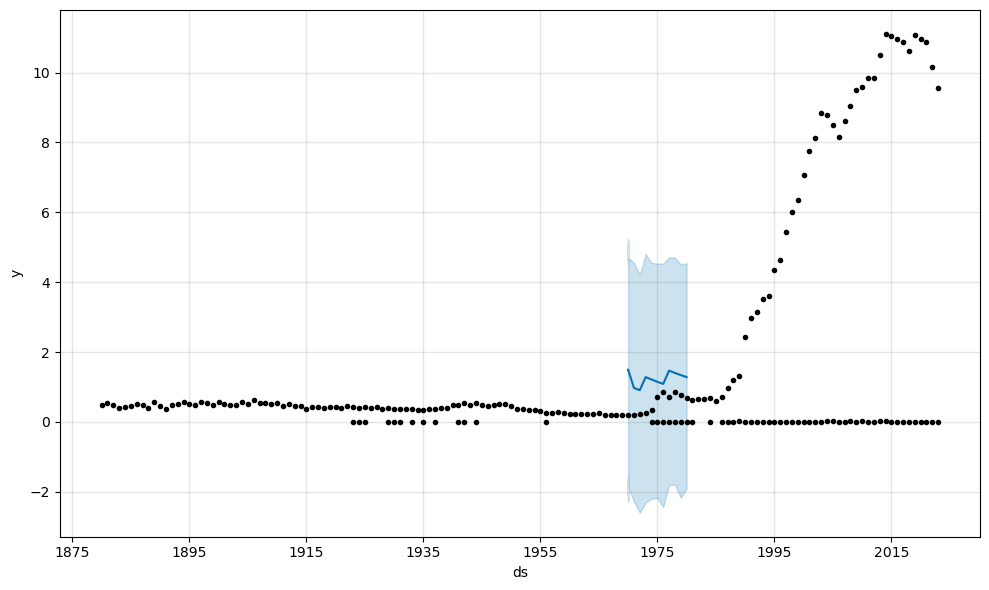

In [26]:
# Initialize a Prophet model
model_ratio = Prophet()

# Fit the model on the data
model_ratio.fit(top_female_name_df_prophet_ratio)

# Make a future dataframe for the next 10 years
future_ratio = model_ratio.make_future_dataframe(periods=10, freq='Y')

# Forecast the future values
forecast_ratio = model_ratio.predict(future_ratio)

# Display the forecast
print(forecast_ratio[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig_ratio = model_ratio.plot(forecast_ratio)
fig_ratio.show()